In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('./Final Data/reddit_train.csv')
df_test = pd.read_csv('./Final Data/reddit_test.csv')

In [4]:
df = pd.concat([df_train, df_test])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587 entries, 0 to 317
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1587 non-null   int64  
 1   author      1587 non-null   object 
 2   postdate    1587 non-null   object 
 3   subreddit   1587 non-null   object 
 4   Text        1587 non-null   object 
 5   Word_count  1587 non-null   int64  
 6   Outcome     1587 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 99.2+ KB


In [5]:
df.Outcome.value_counts()

0.0    992
1.0    401
2.0    194
Name: Outcome, dtype: int64

# EDA

**BarPlot**

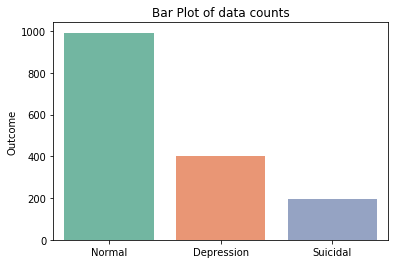

In [105]:
sns.barplot(['Normal', 'Depression', 'Suicidal'], 
            df.Outcome.value_counts(), palette = 'Set2')
plt.title('Bar Plot of data counts')
plt.savefig('./Image Output/BarPlot Count.png')
plt.show()

**Violin Plot**

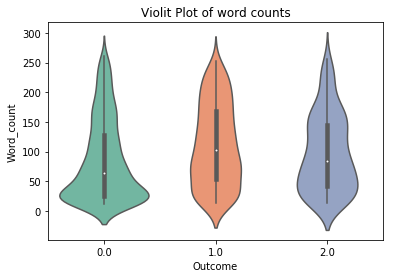

In [104]:
sns.violinplot(x = 'Outcome', y = 'Word_count', data = df, palette = 'Set2')
plt.title('Violit Plot of word counts')
plt.savefig('./Image Output/Violin Plot.png')
plt.show()

**Word Cloud**

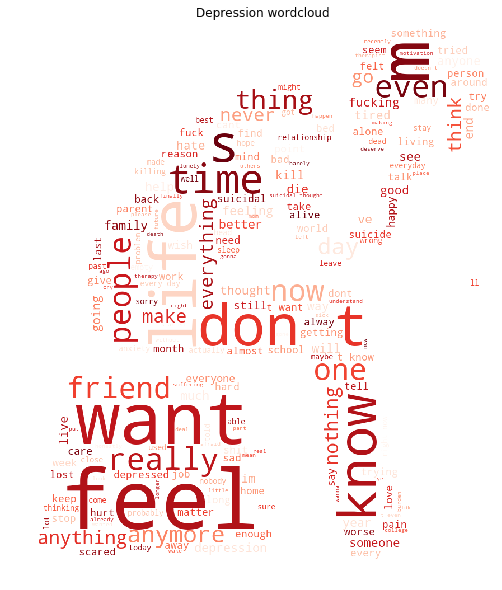

In [15]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

char_mask = np.array(Image.open("people.jpg"))
# image_colors = ImageColorGenerator(char_mask)

depression = df[df.Outcome  == 1]['Text']
text_depression = ""
for i in depression:
    text_depression += i
wordcloud1 = WordCloud(background_color = 'white', 
                       mask = char_mask,
                       colormap = 'Reds',
                       collocations = True).generate(text_depression)

plt.figure(figsize = (20,10))
plt.title('Depression wordcloud')
plt.imshow(wordcloud1.recolor(random_state=2019))
plt.axis('off')
plt.show()

In [17]:
wordcloud1.to_file('Depression_WordCloud.png')

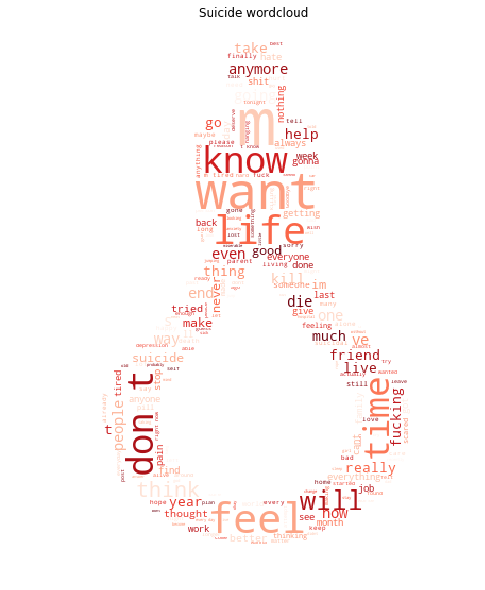

In [9]:
char_mask2 = np.array(Image.open("rope.jpg"))

suicide = df[df.Outcome  == 2]['Text']
text_suicide = ""
for i in suicide:
    text_suicide += i
wordcloud2 = WordCloud(background_color = 'white', 
                       mask = char_mask2,
                       colormap = 'Reds').generate(text_suicide)



plt.figure(figsize = (20,10))
plt.title('Suicide wordcloud')
plt.axis('off')
plt.imshow(wordcloud2.recolor(random_state=2017))
plt.show()

In [18]:
wordcloud2.to_file('Suicide_WordCloud.png')

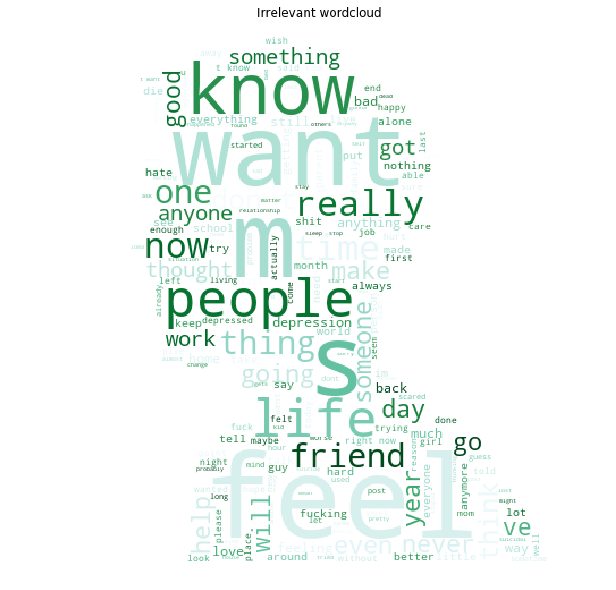

In [30]:
char_mask3 = np.array(Image.open("normal.jpg"))


irrelevant = df[df.Outcome  == 0]['Text']
text_irrelevant = ""
for i in irrelevant:
    text_irrelevant += i
wordcloud0 = WordCloud(background_color = 'white',
                       mask = char_mask3,
                       colormap = 'BuGn').generate(text_irrelevant)

plt.figure(figsize = (20,10))
plt.title('Irrelevant wordcloud')
plt.axis('off')
plt.imshow(wordcloud0.recolor(random_state=2017))
plt.show()

In [31]:
wordcloud0.to_file('Normal_WordCloud.png')

**Most common word Bar Plot**

In [32]:
def get_top_n_words(vec, corpus, n=10):
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    df_word = pd.DataFrame(words_freq, columns = ['word', 'counts'])[:n]
    return df_word

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

#Define TF-IDF Vectorizer
X = df.Text

vectorizer = CountVectorizer(stop_words='english', ngram_range = (1,3))
X_vec = vectorizer.fit_transform(X)

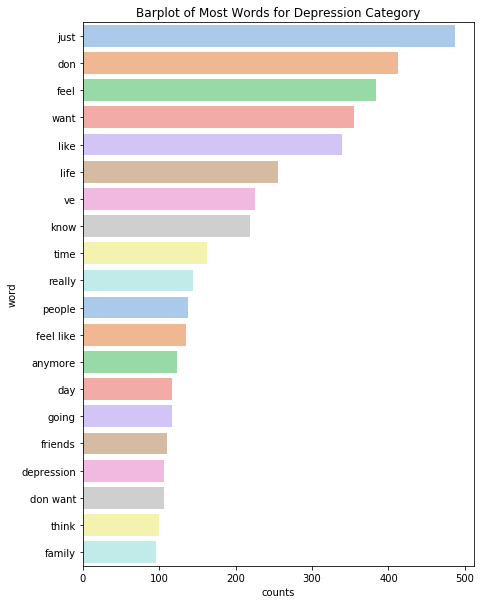

In [42]:
depression = df[df.Outcome  == 1]['Text']
text_depression = ""
for i in depression:
    text_depression += i
df_word_1 = get_top_n_words(vectorizer, [text_depression], 20)

plt.figure(figsize = (7,10))
sns.barplot(y = 'word', x = 'counts', data = df_word_1, palette = 'pastel')
plt.title('Barplot of Most Words for Depression Category')
plt.show()

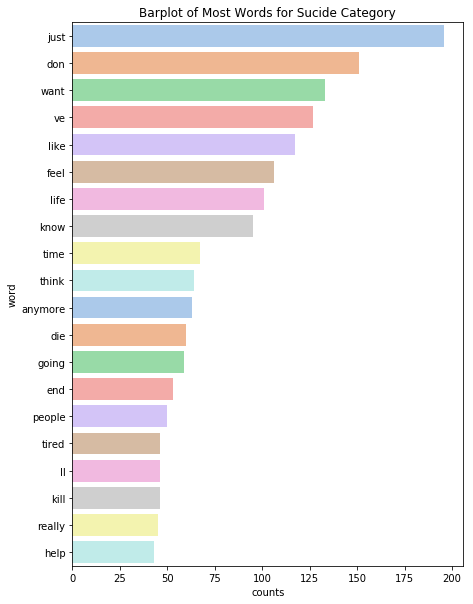

In [49]:
suicide = df[df.Outcome  == 2]['Text']
text_suicide = ""
for i in suicide:
    text_suicide += i
df_word_2 = get_top_n_words(vectorizer, [text_suicide], 20)

plt.figure(figsize = (7,10))
sns.barplot(y = 'word', x = 'counts', data = df_word_2, palette = 'pastel')
plt.title('Barplot of Most Words for Sucide Category')
plt.show()

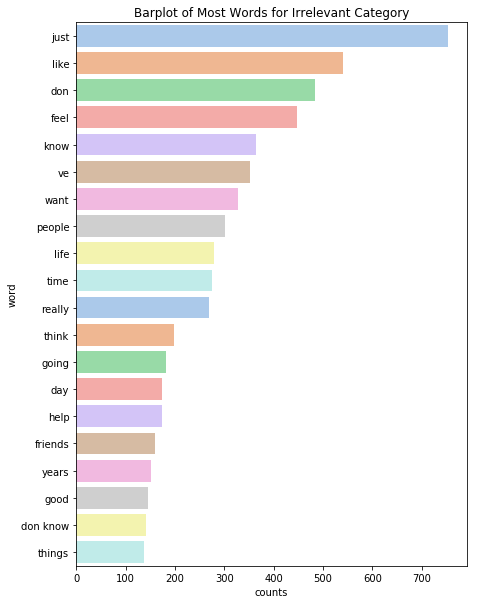

In [51]:
irrelevant = df[df.Outcome  == 0]['Text']
text_irrelevant = ""
for i in irrelevant:
    text_irrelevant += i
df_word_0 = get_top_n_words(vectorizer, [text_irrelevant], 20)


plt.figure(figsize = (7,10))
sns.barplot(y = 'word', x = 'counts', data = df_word_0, palette = 'pastel')
plt.title('Barplot of Most Words for Irrelevant Category')
plt.show()

**Scatter Plot**

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

#Define TF-IDF Vectorizer
X = df.Text

vectorizer = CountVectorizer(stop_words='english',ngram_range = (1,3))
X_vec = vectorizer.fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_vec.toarray())
principal_df = pd.DataFrame(data = principalComponents, columns = ['feature1', 'feature2'])

principal_df = principal_df.join(df[['Outcome']].reset_index(drop = True))
principal_df.Outcome = principal_df.Outcome.astype(int)

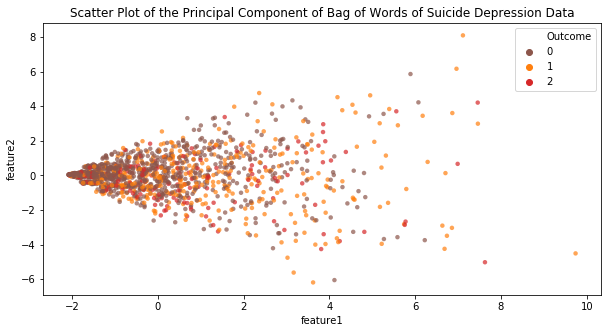

In [101]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('Scatter Plot of the Principal Component of Bag of Words of Suicide Depression Data')
ax = sns.scatterplot(x = 'feature1', 
                y = 'feature2', 
                hue='Outcome', 
                data = principal_df,
                palette = ['C5', 'C1', 'C3'],
                s = 20, linewidth = 0, alpha = 0.7)
plt.savefig('./Image Output/pca_countvectorizer.png')
plt.show()

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

#Define TF-IDF Vectorizer
X = df.Text

vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (1,3))
X_vec = vectorizer.fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_vec.toarray())
principal_df = pd.DataFrame(data = principalComponents, columns = ['feature1', 'feature2'])

principal_df = principal_df.join(df[['Outcome']].reset_index(drop = True))
principal_df.Outcome = principal_df.Outcome.astype(int)

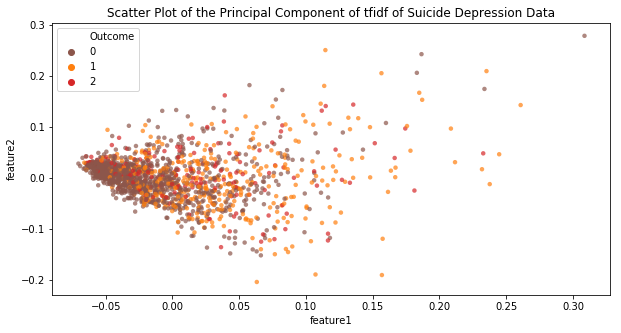

In [103]:
fig, ax = plt.subplots(figsize = (10,5))
plt.title('Scatter Plot of the Principal Component of tfidf of Suicide Depression Data')
ax = sns.scatterplot(x = 'feature1', 
                y = 'feature2', 
                hue='Outcome', 
                data = principal_df,
                palette = ['C5', 'C1', 'C3'],
                s = 20, linewidth = 0, alpha = 0.7)
plt.savefig('./Image Output/pca_tfidf.png')
plt.show()

**Barplot of Features Importance** 

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

vectorizer = CountVectorizer(ngram_range = (1,3))
X = df.Text
y = df.Outcome
X_vec = vectorizer.fit_transform(X)

lr = LogisticRegression(n_jobs = -1, C = 1e5)
lr.fit(X_vec, y)

LogisticRegression(C=100000.0, n_jobs=-1)

In [94]:
feature_name = pd.Series(vectorizer.get_feature_names())

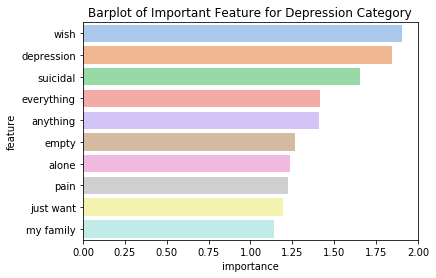

In [95]:
importance = pd.Series(lr.coef_[1])
id_imp = importance.sort_values(ascending = False).index[:10]
imp_val = importance.sort_values(ascending = False).values
feature = feature_name.loc[id_imp]
feature_df_1 = pd.DataFrame({'feature' : feature, 'importance': imp_val[:10]})

sns.barplot(y = 'feature', x = 'importance', data = feature_df_1, palette = 'pastel')
plt.title('Barplot of Important Feature for Depression Category')
plt.savefig('./Image Output/barplot_depression_1_3.png')
plt.show()

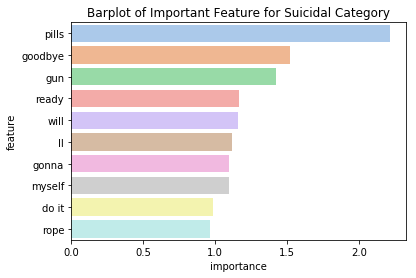

In [96]:
importance = pd.Series(lr.coef_[2])
id_imp = importance.sort_values(ascending = False).index[:10]
imp_val = importance.sort_values(ascending = False).values
feature = feature_name.loc[id_imp]
feature_df_2 = pd.DataFrame({'feature' : feature, 'importance': imp_val[:10]})

sns.barplot(y = 'feature', x = 'importance', data = feature_df_2, palette = 'pastel')
plt.title('Barplot of Important Feature for Suicidal Category')
plt.savefig('./Image Output/barplot_suicidal_1_3.png')
plt.show()

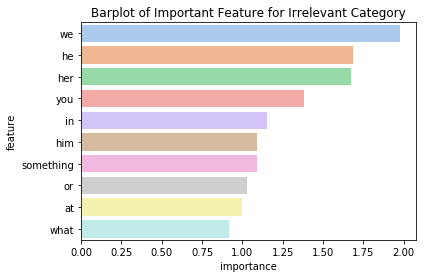

In [97]:
importance = pd.Series(lr.coef_[0])
id_imp = importance.sort_values(ascending = False).index[:10]
imp_val = importance.sort_values(ascending = False).values
feature = feature_name.loc[id_imp]
feature_df_0 = pd.DataFrame({'feature' : feature, 'importance': imp_val[:10]})

sns.barplot(y = 'feature', x = 'importance', data = feature_df_0, palette = 'pastel')
plt.title('Barplot of Important Feature for Irrelevant Category')
plt.savefig('./Image Output/barplot_irrelevant_1_3.png')
plt.show()